In [11]:
import matplotlib.pyplot as plt

In [1]:
from model_utils import *
from sklearn.svm import SVC
import numpy as np

loc_df, X_loc_train, y_loc_train, X_loc_valid, y_loc_valid, X_loc_test, y_loc_test = load_loc_data('../')
vec_df, X_vec_train, y_vec_train, X_vec_valid, y_vec_valid, X_vec_test, y_vec_test = load_vec_data('../')

In [5]:
loc_svm = SVC(kernel='linear', probability=True, random_state=42)
loc_svm.fit(X_loc_train, y_loc_train);

D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

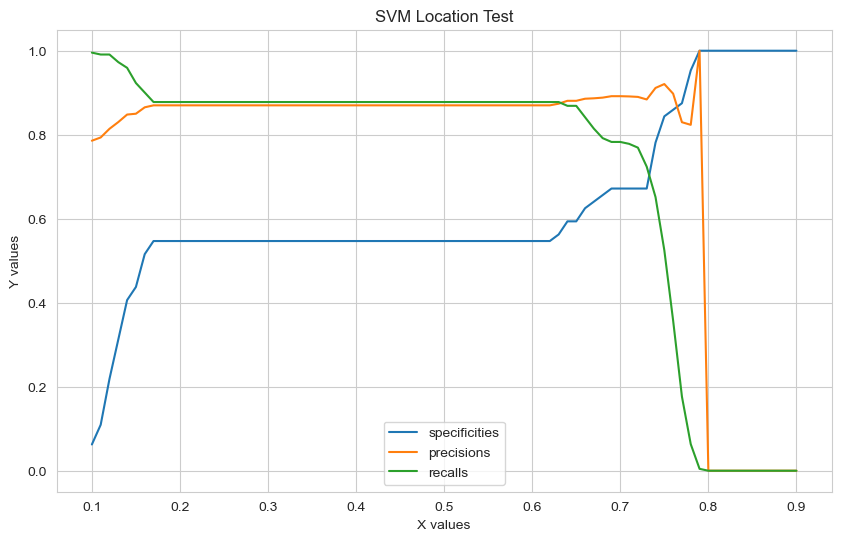

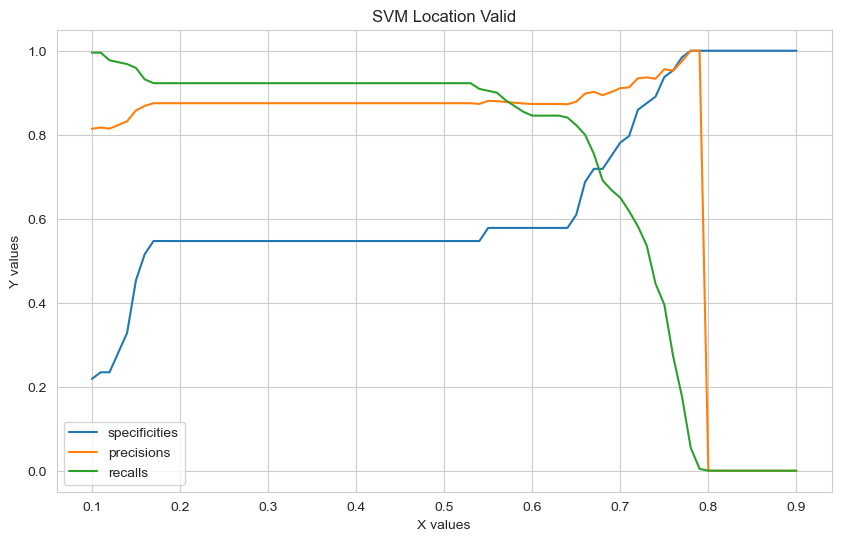

In [22]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.91, 0.01)

for th in rang:
    test_probs = loc_svm.predict_proba(X_loc_test)[:, 1]
    test_pred = (test_probs >= th).astype(int)
    prec1, recal1, spec1, _ = apply_metric(y_vec_test, test_pred, False)
    valid_probs = loc_svm.predict_proba(X_loc_valid)[:, 1]
    valid_pred = (valid_probs >= th).astype(int)
    prec2, recal2, spec2, _ = apply_metric(y_vec_valid, valid_pred, False)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)

plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('SVM Location Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('SVM Location Valid')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

In [23]:
threshold = 0.8

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_1, recalls_1, specificities_1)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("TEST DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_1[highest_idx]:.2f}')
print(f'Recall: {recalls_1[highest_idx]:.2f}')
print(f'Specificity: {specificities_1[highest_idx]:.2f}')

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_2, recalls_2, specificities_2)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("\nVALID DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_2[highest_idx]:.2f}')
print(f'Recall: {recalls_2[highest_idx]:.2f}')
print(f'Specificity: {specificities_2[highest_idx]:.2f}')

TEST DATASET
id = 57
Precision: 0.89
Recall: 0.81
Specificity: 0.64

VALID DATASET
id = 56
Precision: 0.90
Recall: 0.80
Specificity: 0.69


In [6]:
vec_svm = SVC(kernel='linear', probability=True, random_state=42)
vec_svm.fit(X_vec_train, y_vec_train);

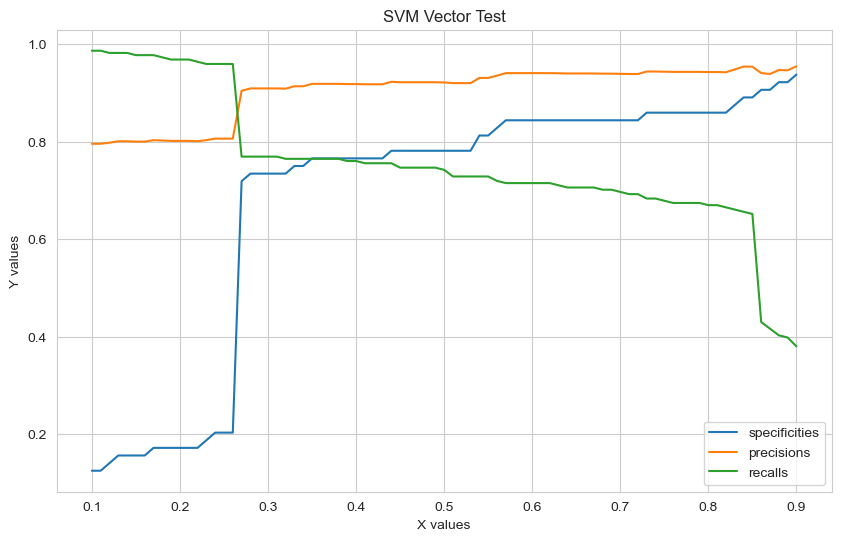

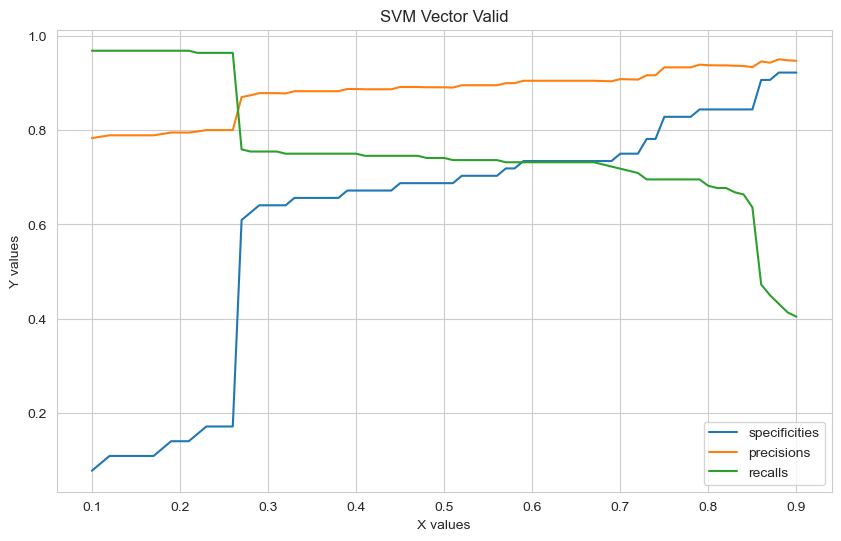

In [20]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.91, 0.01)

for th in rang:
    test_probs = vec_svm.predict_proba(X_vec_test)[:, 1]
    test_pred = (test_probs >= th).astype(int)
    prec1, recal1, spec1, _ = apply_metric(y_vec_test, test_pred, False)
    valid_probs = vec_svm.predict_proba(X_vec_valid)[:, 1]
    valid_pred = (valid_probs >= th).astype(int)
    prec2, recal2, spec2, _ = apply_metric(y_vec_valid, valid_pred, False)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('SVM Vector Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('SVM Vector Valid')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

In [21]:
threshold = 0.8

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_1, recalls_1, specificities_1)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("TEST DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_1[highest_idx]:.2f}')
print(f'Recall: {recalls_1[highest_idx]:.2f}')
print(f'Specificity: {specificities_1[highest_idx]:.2f}')

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_2, recalls_2, specificities_2)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("\nVALID DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_2[highest_idx]:.2f}')
print(f'Recall: {recalls_2[highest_idx]:.2f}')
print(f'Specificity: {specificities_2[highest_idx]:.2f}')

TEST DATASET
id = 14
Precision: 0.81
Recall: 0.96
Specificity: 0.20

VALID DATASET
id = 13
Precision: 0.80
Recall: 0.96
Specificity: 0.17


In [7]:
from sklearn.linear_model import LogisticRegression

val_preds1 = loc_svm.predict_proba(X_loc_train)[:, 1]
val_preds2 = vec_svm.predict_proba(X_vec_train)[:, 1]

stacked_features = np.column_stack((val_preds1, val_preds2))

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_loc_train);

In [9]:
test_preds1 = loc_svm.predict_proba(X_loc_test)[:, 1]
test_preds2 = vec_svm.predict_proba(X_vec_test)[:, 1]
test_x  = np.column_stack((test_preds1, test_preds2))

test_pred = meta_model.predict(test_x)

apply_metric(y_loc_test, test_pred)

CM: 
[[ 52  12]
 [ 53 168]]
Precision: 0.93
Recall: 0.76
Specificity: 0.81
Accuracy: 0.77


(0.9333333333333333,
 0.7601809954751131,
 0.8125,
 array([[ 52,  12],
        [ 53, 168]], dtype=int64))

In [10]:
valid_preds1 = loc_svm.predict_proba(X_loc_valid)[:, 1]
valid_preds2 = vec_svm.predict_proba(X_vec_valid)[:, 1]
valid_x  = np.column_stack((valid_preds1, valid_preds2))

valid_pred = meta_model.predict(valid_x)

apply_metric(y_loc_valid, valid_pred)

CM: 
[[ 45  19]
 [ 56 164]]
Precision: 0.90
Recall: 0.75
Specificity: 0.70
Accuracy: 0.74


(0.8961748633879781,
 0.7454545454545455,
 0.703125,
 array([[ 45,  19],
        [ 56, 164]], dtype=int64))